In [2]:
# Importing necessary libraries to build the machine learning model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the train and test data files.
# Train data contains digit data and the correct labels
# Test data contains just the digit data and no labels 
mnist_train = pd.read_csv("data/mnist/train.csv")
mnist_test = pd.read_csv("data/mnist/test.csv")

Text(0.5,1,'First digit in test data ')

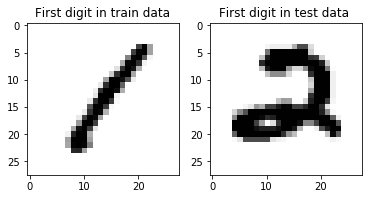

In [4]:
# Let's visualize the image represented by the first rows of both train and test data
train_data_digit1 = np.asarray(mnist_train.iloc[0:1,1:]).reshape(28,28)
test_data_digit1 = np.asarray(mnist_test.iloc[0:1,]).reshape(28,28)
plt.subplot(1,2,1)
plt.imshow(train_data_digit1,cmap = plt.cm.gray_r)
plt.title("First digit in train data")
plt.subplot(1,2,2)
plt.imshow(test_data_digit1,cmap = plt.cm.gray_r)
plt.title("First digit in test data ")

In [5]:
"""Let us now assign the label column value to a new variable Y_train 
and the remaining column values to X_train"""
X_train = mnist_train.iloc[:,1:]
Y_train = mnist_train.iloc[:,0:1]

In [6]:
from sklearn.neural_network import MLPClassifier
# Let us now create a machine learning model to learn from train data
# We shall use a simple 1 layer 50 node neural network to learn this. 
nn_model = MLPClassifier(hidden_layer_sizes=(50))
# The fit method initiates the learning process. When its execution completes, the model is learnt
nn_model.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [7]:
# Now that we have a model, lets get it to predict the value of the first digit in the test data
print(nn_model.predict(mnist_test.iloc[0:1,]))

[2]


In [14]:
print("Accuracy of model:", nn_model.score(X_train,Y_train))

Accuracy of model: 0.9816904761904762


In [13]:
predicted_digit = nn_model.predict(X_train)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(Y_train,predicted_digit),
             index=range(0,10),columns=range(0,10))

,0,1,2,3,4,5,6,7,8,9
0,4112,0,0,0,0,1,5,0,12,2
1,1,4649,4,3,5,3,1,2,10,6
2,25,3,4079,32,9,2,0,10,15,2
3,26,0,27,4188,1,47,0,15,15,32
4,11,3,2,1,4029,0,0,0,5,21
5,16,0,0,14,0,3748,5,0,6,6
6,16,0,0,0,0,21,4079,1,20,0
7,2,6,35,2,10,0,0,4310,1,35
8,29,4,9,27,1,8,1,0,3947,37
9,25,0,0,11,31,4,0,20,7,4090
